In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [2]:
with open('betastars.txt') as f:
    betastars = np.array([[float(x) for x in line.split(',')] for line in f])

In [3]:
betastars = betastars.flatten()

In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', label='lin')

In [5]:
def expcurve(parameters):
    """Plot an exponential curve"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = exp_model(x_vals, *parameters)
    plt.plot(x_vals, y_vals, '-', label='exp')

In [6]:
def invcurve(parameters):
    """Plot an exponential curve"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = inv_model(x_vals, *parameters)
    plt.plot(x_vals, y_vals, '-', label='inv')

In [7]:
def exp_model(x, a, b):
    return a*np.exp(-0.01*x)+b

In [8]:
def inv_model(x, a, b, c):
    return a / x**b+c

In [9]:
# Fit curves
x = np.array(list(range(4, 28)))
y = betastars
drop = 6 # Drop 

# Fit a line
reg = LinearRegression().fit(x.reshape(-1,1)[drop:], y[drop:])
exp_params, _ = curve_fit(exp_model, x[drop:], y[drop:], p0=(1,1))
inv_params, _ = curve_fit(inv_model, x[drop:], y[drop:], p0=(0.001,0.001,0.001))

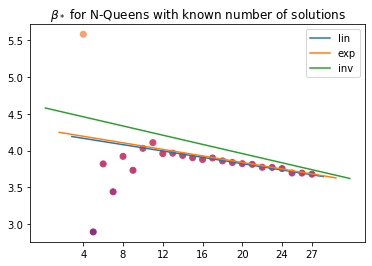

In [10]:
# Colours
colors = y
cmap = mpl.cm.magma
norm = mpl.colors.Normalize(vmin=0, vmax=7)

# Draw lines
fig, ax = plt.subplots()
plt.scatter(x,y,c=colors, cmap=cmap, norm=norm)
abline(reg.coef_[0], reg.intercept_)
expcurve(exp_params)
invcurve(inv_params)

# title, legend, axes, ticks
plt.title(r"$\beta_*$ for N-Queens with known number of solutions")
ax.set_xticks(np.append(x[::4],27))
plt.legend()
plt.show()

In [11]:
print("Lin model (ax+b):\tb = {0:.2f}".format(reg.intercept_), "a= {0:.2f}".format(reg.coef_[0]))
print("(N=1000) predicted β*:\t {0:.3f}".format(reg.predict([[1000]])[0]), "\n")

print("Exp model a*exp(-0.01x)+b:\t", "a = {0:.2f}, b = {1:.2f}".format(*exp_params))
print("(N=1000) predicted β*:\t {0:.3f}".format(exp_model(1000, *exp_params)), "\n")

print("Inv model a/x^b+c:\t", "a = {0:.2f}, b = {1:.2f}, c={1:.2f}".format(*(inv_params)))
print("(N=1000) predicted β*:\t {0:.3f}".format(inv_model(1000, *(inv_params))))

Lin model (ax+b):	b = 4.25 a= -0.02
(N=1000) predicted β*:	 -17.326 

Exp model a*exp(-0.01x)+b:	 a = 2.60, b = 1.69
(N=1000) predicted β*:	 1.693 

Inv model a/x^b+c:	 a = -0.21, b = -0.47, c=-0.47
(N=1000) predicted β*:	 -0.746


In [12]:
np.arange(100, 1001, 100)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [16]:
betastring = ",".join(str(x)[:5] for x in exp_model(np.arange(100, 1001, 100), *exp_params)) 

In [17]:
# Write predicted betas for 50 to 1000 step 50
with open('fitbetastars.csv','w') as f:
     f.write(betastring)